In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm
import cv2
import itertools

import tensorflow as tf
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import backend as K

from sklearn.metrics import confusion_matrix

%matplotlib inline

In [15]:
import tensorflow as tf
import urllib.request
import zipfile
import tensorflow as tf
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [17]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split
# from google.colab import files
# import zipfile

In [18]:
# print("Dataset berhasil diunggah dan diekstrak.")

# # Path untuk output test set/content/drive/MyDrive/capstone_wise/test_da
# output_dir = '/content/drive/MyDrive/capstone_wise/test_awesome'

# # Path untuk dataset asli
# dataset_dir = '/content/drive/MyDrive/capstone_wise/train_withburnlevel'

# # Proporsi data test
# test_size = 0.2  # 20% untuk test

# # === Split dataset hanya untuk test set ===
# for label in os.listdir(dataset_dir):
#     label_path = os.path.join(dataset_dir, label)

#     if os.path.isdir(label_path):
#         # Dapatkan semua file di folder label
#         files = os.listdir(label_path)
#         files = [os.path.join(label_path, f) for f in files if os.path.isfile(os.path.join(label_path, f))]

#         # Cek apakah folder memiliki file
#         if len(files) == 0:
#             print(f"Folder '{label}' kosong atau tidak ada file valid. Melewati folder ini.")
#             continue

#         # Bagi dataset menjadi train-test
#         _, test_files = train_test_split(files, test_size=test_size, random_state=42)

#         # Buat folder output untuk test
#         test_label_dir = os.path.join(output_dir, label)
#         os.makedirs(test_label_dir, exist_ok=True)

#         # Salin file ke folder test
#         for f in test_files:
#             shutil.copy(f, test_label_dir)

# print("Test dataset berhasil dibuat!")

In [19]:
# import shutil
# from google.colab import files

# # Path untuk output test set
# output_dir = '/content/drive/MyDrive/capstone_wise/test_burn_1'

# # Path untuk file zip
# zip_file = '/content/test_burn_1.zip'

# # Kompres folder output menjadi file zip
# shutil.make_archive(base_name='/content/test_burn_1', format='zip', root_dir=output_dir)

# # Sediakan file untuk diunduh
# files.download(zip_file)

# print("File zip telah dibuat dan siap untuk diunduh!")


In [20]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.75 and logs.get('val_accuracy') > 0.75):
            print("Accuracy is enough")
            self.model.stop_training = True

In [21]:
train_dir = 'E:/ASUS/Documents/bangkit/dataset_wound'
test_dir2 = 'E:/ASUS/Documents/bangkit/test_awesome'

In [22]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

test_datagen = ImageDataGenerator(
        rescale=1./255
    )

In [23]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64,64),
        batch_size=64,
        class_mode='categorical'
    )

test_generator = test_datagen.flow_from_directory(
        test_dir2,
        target_size=(64,64),
        batch_size=64,
        class_mode='categorical'
    )

Found 29728 images belonging to 10 classes.
Found 5955 images belonging to 10 classes.


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64,64,3)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary(

)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,095,050 (19.44 MB)

 Trainable params: 5,095,050 (19.44 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

Epoch 1/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 195s 417ms/step - accuracy: 0.5107 - loss: 1.1120 - val_accuracy: 0.6470 - val_loss: 0.8179
Epoch 2/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 99s 213ms/step - accuracy: 0.6440 - loss: 0.8245 - val_accuracy: 0.6571 - val_loss: 0.7853
Epoch 3/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 101s 217ms/step - accuracy: 0.6658 - loss: 0.7754 - val_accuracy: 0.6848 - val_loss: 0.7357
Epoch 4/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 101s 216ms/step - accuracy: 0.6712 - loss: 0.7599 - val_accuracy: 0.6925 - val_loss: 0.7199
Epoch 5/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 98s 211ms/step - accuracy: 0.6880 - loss: 0.7314 - val_accuracy: 0.6411 - val_loss: 0.8227
Epoch 6/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 98s 211ms/step - accuracy: 0.7029 - loss: 0.7062 - val_accuracy: 0.7066 - val_loss: 0.6980
Epoch 7/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 98s 212ms/step - accuracy: 0.7074 - loss: 0.6813 - val_accuracy: 0.7286 - val_loss: 0.6515
Epoch 8/50
465/465 ━━━━━━━━━━━━━━━━━━━━ 99s 212ms/step - accuracy: 0.7184 - loss

In [26]:
# Tentukan local path untuk menyimpan model
save_path = 'E:/ASUS/Documents/bangkit/kepston/wounds_model.h5'

# Simpan model ke local path
model.save(save_path)
print(f"Model disimpan di {save_path}")

# Jika ingin memastikan file sudah tersimpan, gunakan os.listdir() untuk memeriksa
import os
if save_path in os.listdir('.'):
    print(f"File {save_path} berhasil disimpan di direktori saat ini.")
else:
    print("File tidak ditemukan. Periksa kembali path.")

Model disimpan di E:/ASUS/Documents/bangkit/kepston/wounds_model.h5
File tidak ditemukan. Periksa kembali path.


In [34]:
model_path = 'E:/ASUS/Documents/bangkit/kepston/wounds_model.h5'

class_names = ['1st degree burn', '2nd degree burn', '3nd degree burn', 'Abrasions', 'Bruises', 'Burns', 'Cut', 'Ingrown_nails', 'Laceration', 'Stab_wound']

print("Kelas yang dikenali oleh model:")
for idx, class_name in enumerate(class_names):
    print(f"{idx}: {class_name}")

Kelas yang dikenali oleh model:
0: 1st degree burn
1: 2nd degree burn
2: 3nd degree burn
3: Abrasions
4: Bruises
5: Burns
6: Cut
7: Ingrown_nails
8: Laceration
9: Stab_wound


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


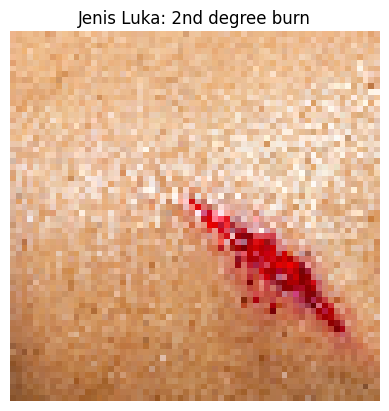

In [35]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(64, 64)):
    """
    Preprocessing gambar untuk digunakan sebagai input model.
    - Resize gambar ke ukuran target.
    - Normalisasi nilai piksel (0-255 menjadi 0-1).
    - Tambahkan dimensi batch.

    Args:
        image_path (str): Path gambar.
        target_size (tuple): Ukuran target (height, width).

    Returns:
        numpy.ndarray: Array gambar yang sudah diproses.
    """

    img = load_img(image_path, target_size=target_size)  # Resize gambar
    img_array = img_to_array(img)  # Konversi ke array NumPy
    img_array = img_array / 255.0  # Normalisasi (0-1)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch

    return img, img_array

model_path = 'E:/ASUS/Documents/bangkit/kepston/wounds_model.h5'  # Ganti dengan path model Anda
model = load_model(model_path)

class_names = ['1st degree burn', '2nd degree burn', '3nd degree burn', 'Abrasions', 'Bruises', 'Burns', 'Cut', 'Ingrown_nails', 'Laceration', 'Stab_wound']  # Ganti dengan nama kelas Anda

image_path = 'E:/ASUS/Documents/bangkit/test/percobaan-1.jpg'  # Ganti dengan path gambar Anda

original_image, processed_image = preprocess_image(image_path)
# Prediksi gambar
predictions = model.predict(processed_image)
predicted_class_idx = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_idx]

plt.imshow(np.array(original_image))
plt.title(f"Jenis Luka: {predicted_class_name}")
plt.axis('off')
plt.show()